### **IMPORT DATA**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

population = pd.read_csv('/content/List_of_Sudanese_states_by_population_1.csv')
disease = pd.read_excel('/content/combined_data_cases.xlsx')

### **DATA CLEANSING**

In [2]:
disease['state'].unique()

array(['Al Jazirah', 'Al Qadarif', 'Blue Nile', 'Central Darfur',
       'East Darfur', 'Kassala', 'Khartoum', 'North Darfur',
       'North Kordofan', 'Northern', 'Red Sea', 'River Nile', 'Sennar',
       'South Darfur', 'South Kordofan', 'West Darfur', 'West Kordofan',
       'White Nile', 'Aj Jazirah'], dtype=object)

In [3]:
#Clean data disease
disease['state']= disease['state'].replace('Aj Jazirah', 'Al Jazirah')
disease['state'].unique()

array(['Al Jazirah', 'Al Qadarif', 'Blue Nile', 'Central Darfur',
       'East Darfur', 'Kassala', 'Khartoum', 'North Darfur',
       'North Kordofan', 'Northern', 'Red Sea', 'River Nile', 'Sennar',
       'South Darfur', 'South Kordofan', 'West Darfur', 'West Kordofan',
       'White Nile'], dtype=object)

In [4]:
#Clean data populatiom
different_d = set(disease['state']) - set(population['Name'])
different_p = set(population['Name']) - set(disease['state'])
print('Difference in disease', different_d)
print('Difference in population', different_p)

Difference in disease {'Al Jazirah', 'Sennar'}
Difference in population {'Gezira', 'Sinnar'}


In [5]:
population['Name'] = population['Name'].replace('Gezira', 'Al Jazirah')
population['Name'] = population['Name'].replace('Sennar', 'Sinnar')

In [6]:
different = set(disease['state']) == set(population['Name'])
print(different)

False


### **CONCATENATE DF**

In [7]:
print(disease['state'].nunique())
print(population['Name'].nunique())

18
18


In [8]:
df = pd.merge(disease, population, left_on='state', right_on='Name')
df.head()

,state,year,disease,cases,deaths,Rank,Name,Population
0,Al Jazirah,2018,Acute Tonsillitis,16,0,3,Al Jazirah,"5,096,920"
1,Al Qadarif,2018,Acute Tonsillitis,27,0,9,Al Qadarif,"2,208,385"
2,Blue Nile,2018,Acute Tonsillitis,18,0,17,Blue Nile,"1,107,623"
3,Central Darfur,2018,Acute Tonsillitis,2,0,6,Central Darfur,"2,499,000"
4,East Darfur,2018,Acute Tonsillitis,2,0,16,East Darfur,"1,119,451"


In [9]:
df_z = df.groupby(['year', 'state', 'Population'], as_index=False).agg({'cases':'sum', 'deaths':'sum'})
df_z['Population'] = df_z['Population'].str.replace(',', '').astype(float)
df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        51 non-null     int64  
 1   state       51 non-null     object 
 2   Population  51 non-null     float64
 3   cases       51 non-null     int64  
 4   deaths      51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [10]:
df_z['cases/population (%)'] = round(df_z['cases']/df_z['Population']*100, 3)
df_z['deaths/population (%)'] = round(df_z['deaths']/df_z['Population']*100, 3)

In [11]:
df_z.head(3)

,year,state,Population,cases,deaths,cases/population (%),deaths/population (%)
0,2018,Al Jazirah,5096920.0,960,0,0.019,0.0
1,2018,Al Qadarif,2208385.0,599,0,0.027,0.0
2,2018,Blue Nile,1107623.0,1194,0,0.108,0.0


In [12]:
df_cases = df_z.sort_values(by=['year', 'cases/population (%)'], ascending=[True, False], ignore_index=True)
df_deaths= df_z.sort_values(by=['year', 'deaths/population (%)'], ascending=[True, False], ignore_index=True)

## **DATA GRAPG**

### CORRELATION

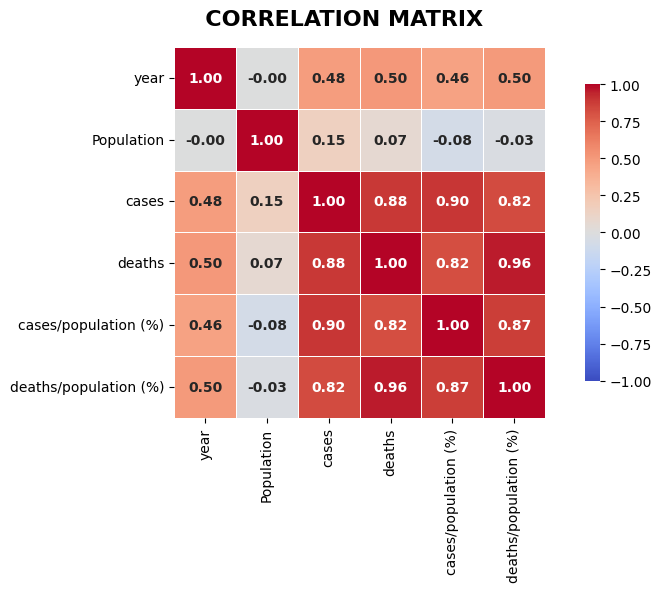

In [13]:
corr = df_z.select_dtypes(include=['int64', 'float64'])
corr = corr.corr()
#graph
plt.figure(figsize=(9, 6))
plt.suptitle('                   CORRELATION MATRIX',fontsize=16,fontweight='bold')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={'size': 10, 'weight': 'bold'},
            cbar_kws={'shrink': 0.8},
            square=True,
            vmin=-1, vmax=1)

plt.tight_layout()
plt.show()

Very pronounced correlation based on cases and deaths, the higher the cases, the more deaths occur. Added to this is the correlation of the percentage of their averages

### DATA GRAPH - TOTAL YEAR

In [14]:
df_total = df_z.groupby('year', as_index=False).agg({'Population':'sum', 'cases':'sum', 'deaths':'sum'})
df_total['cases/population (%)'] = round(df_total['cases']/df_total['Population']*100, 3)
df_total['deaths/population (%)'] = round(df_total['deaths']/df_total['Population']*100, 3)

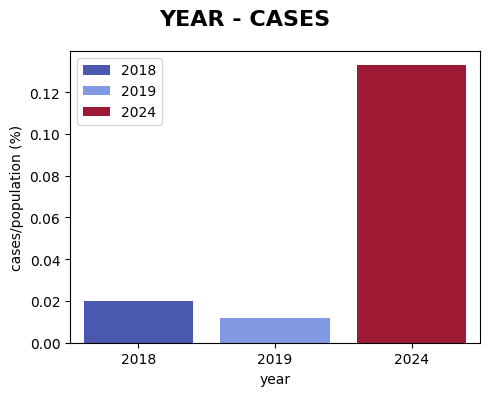

In [15]:
plt.figure(figsize=(5,4))
plt.suptitle('YEAR - CASES',fontsize=16,fontweight='bold')
sns.barplot(data=df_total, x='year', y='cases/population (%)', hue='year', palette='coolwarm')
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
df_total

,year,Population,cases,deaths,cases/population (%),deaths/population (%)
0,2018,44861424.0,9142,0,0.020,0.000
1,2019,44861424.0,5437,49,0.012,0.000
2,2024,44861424.0,59716,1213,0.133,0.003


### DATA GRAPH - YEAR -STATE

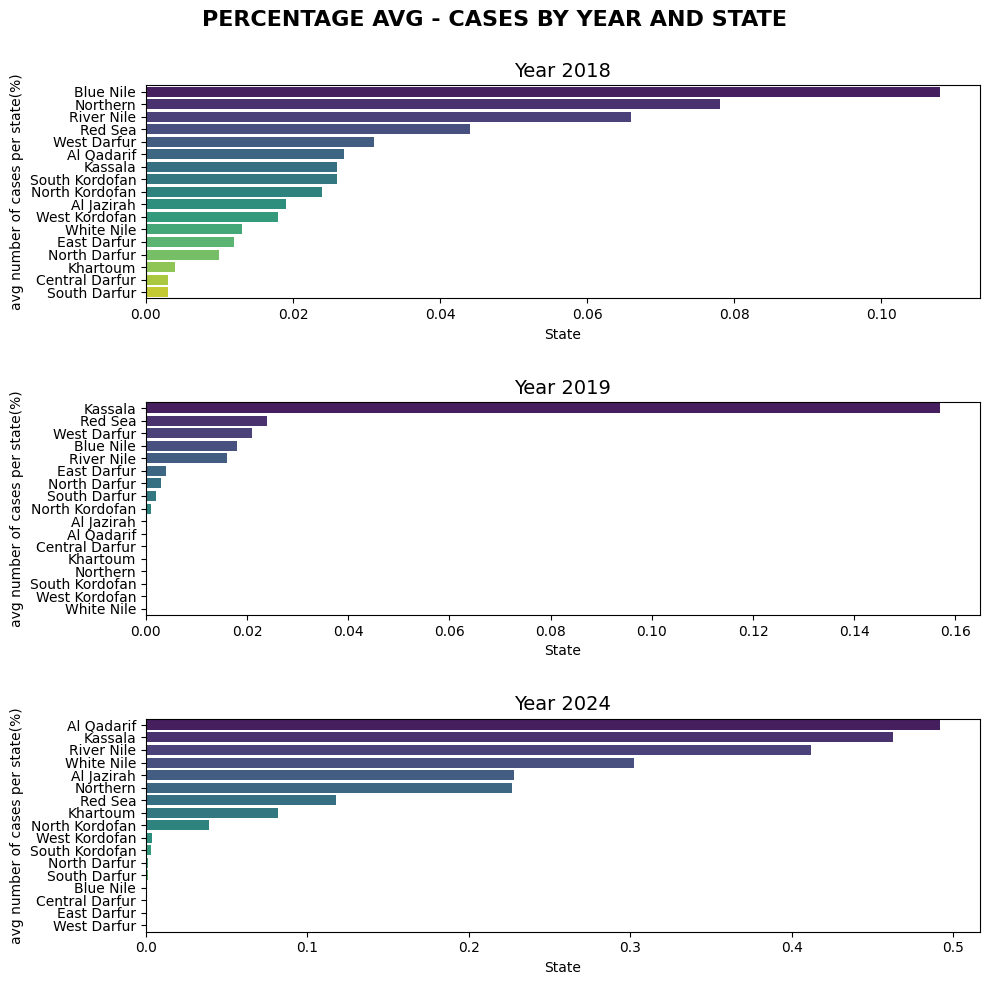

In [17]:
years = df_z['year'].unique()

plt.figure(figsize=(10,10))
plt.suptitle('PERCENTAGE AVG - CASES BY YEAR AND STATE', fontsize=16, fontweight='bold')
for x, year in enumerate(years, 1):
  plt.subplot(3,1,x)
  df_year = df_cases[df_z['year']==year]
  df_sort = df_year.sort_values('cases/population (%)', ascending=False)
  #Graph
  sns.barplot(data=df_sort, y='state', x='cases/population (%)', palette='viridis', hue='state')
  plt.title(f"\nYear {year}", fontsize=14)
  plt.xlabel('State')
  plt.ylabel('avg number of cases per state(%)')
plt.tight_layout()
plt.show()

States with the highest percentage of average cases in 2024:


*   Al Qadarif
*   Kassala
*   River Nile
*   Al Jazirah
*   Northern


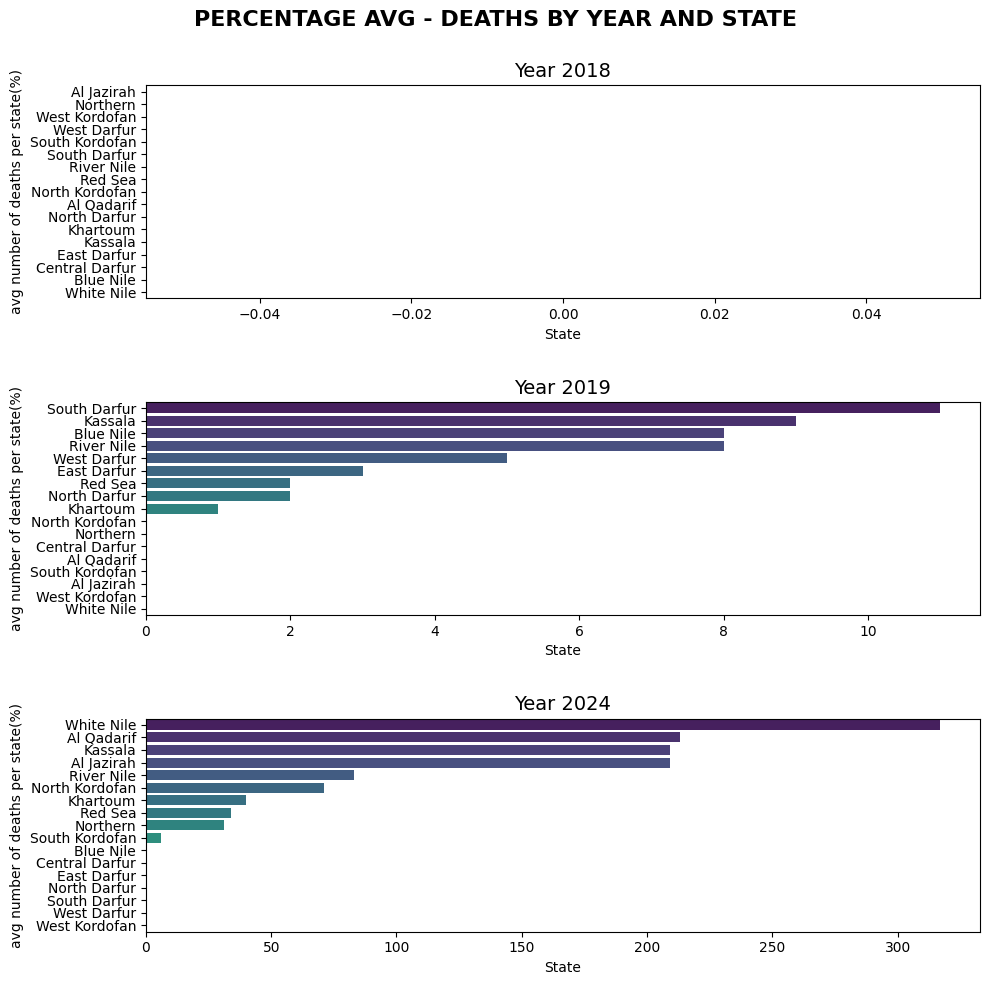

In [18]:
years = df_z['year'].unique()

plt.figure(figsize=(10,10))
plt.suptitle('PERCENTAGE AVG - DEATHS BY YEAR AND STATE', fontsize=16, fontweight='bold')
for x, year in enumerate(years, 1):
  plt.subplot(3,1,x)
  df_year = df_deaths[df_z['year']==year]
  df_sort = df_year.sort_values('deaths', ascending=False)
  #Graph
  sns.barplot(data=df_sort, y='state', x='deaths', palette='viridis', hue='state')
  plt.title(f"\nYear {year}", fontsize=14)
  plt.xlabel('State')
  plt.ylabel('avg number of deaths per state(%)')
plt.tight_layout()
plt.show()

States with the highest percentage of avg deaths in 2024:


*   While Nile
*   Al Qadafari (high avg cases)
*   Kassala (high avg cases)
*   Al Jazirah (high avg cases)
*   River Nile (high avg cases)




## **SUMMARY**

### ANALYSIS
The analysis was based on treating the years independently and taking the data on cases and deaths based on their population, since only then can we know how much impact the disease had on the number of inhabitants.
SINCE THE POPULATION DATA IS NOT AVAILABLE FOR EACH YEAR (2018, 2019, 2024) I TAKE AS A REFERENCE THE POPULATION OF COMBINED_DATA_CASES FOR ALL YEARS.

1. Concatenate the 2 databases
2. Clean the data
3. Choose to calculate the average percentage, adding 2 new columns
4. View and order the cases and deaths from highest to lowest, separating the analysis by year

### CONCLUSION
*   A very pronounced correlation is observed based on cases and deaths, the higher the cases, the more deaths occur. Added to this is the correlation of the percentage of their averages
*   The years go by, the states with the most urgency change, with Kassala being the most affected state in cases and deaths based on the affected population and the years analyzed.
*   The states with the highest percentage of average cases in 2024 are the states with the most deaths.

